In [1]:
import yaml
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (15, 9)})

1. What food do we need to bring?
        e.g. trees, seeds, genetically-modified foods
2. How do we feed people there?
        Consider: supply, manage, distribute, connect
7. What are essential key resources?
        e.g. Electricity, oxygen, water, fuel, brick, plastics, steel, food.
4. How do we decide who will go?
        e.g. population proportions, demographics, health, qualifications, genetic diversity
5. What forms of entertainment would people need?
        e.g. music, books, pets, lego
6. What machines do we need?
        e.g. cars, ships, fighter jets, rockets, computers, mobile phones.

- UN Total Population Data
https://population.un.org/wpp/Download/Standard/CSV/
<br>
-

In [2]:
with open('./data/fake_countries.yaml') as f:
    fake_countries = yaml.safe_load(f)['fake_countries']

fertility_data = './data/WPP2019_Fertility_by_Age.csv'
life_table_data = './data/WPP2019_Life_Table_Medium.csv'

fertility_df = pd.read_csv(fertility_data)
life_table_df = pd.read_csv(life_table_data)

In [3]:
fertility_df.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,AgeGrp,AgeGrpStart,AgeGrpSpan,ASFR,PASFR,Births
0,4,Afghanistan,2,Medium,1950-1955,1953,15-19,15,5,145.245,9.748,280.906
1,4,Afghanistan,2,Medium,1950-1955,1953,20-24,20,5,313.809,21.061,522.501
2,4,Afghanistan,2,Medium,1950-1955,1953,25-29,25,5,339.005,22.752,481.946
3,4,Afghanistan,2,Medium,1950-1955,1953,30-34,30,5,290.535,19.499,351.097
4,4,Afghanistan,2,Medium,1950-1955,1953,35-39,35,5,233.111,15.645,238.645


[Text(0, 0.5, 'Percentage Age-Specific Fertility Rate'),
 Text(0.5, 0, 'Age Group'),
 Text(0.5, 1.0, 'Fertility Between Age Groups(2020)')]

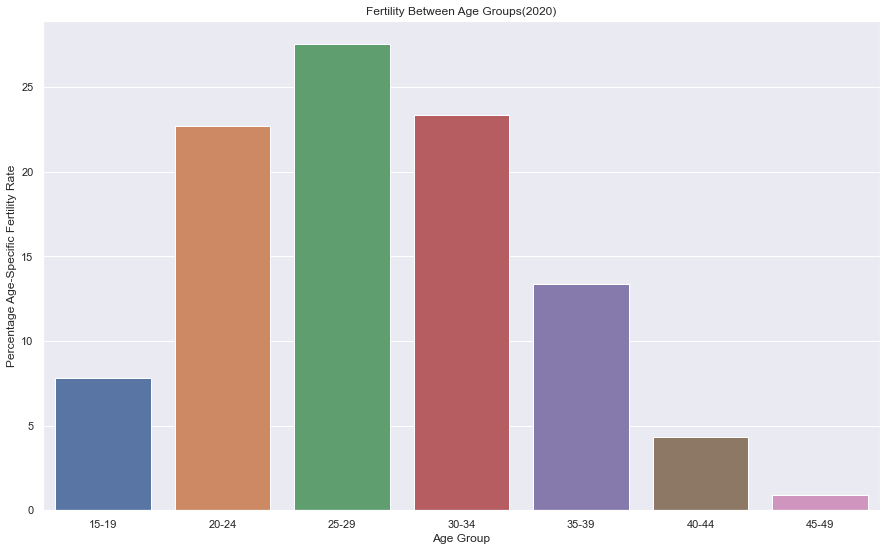

In [4]:
age_groups = fertility_df['AgeGrp'].unique()
fertility_2018_df = fertility_df.loc[fertility_df['MidPeriod'] == 2018][['PASFR', 'AgeGrp']]
avg_br = fertility_2018_df.groupby('AgeGrp')['PASFR'].mean().reset_index()
ax = sns.barplot(x='AgeGrp', y='PASFR', data=avg_br)
ax.set(xlabel='Age Group', ylabel='Percentage Age-Specific Fertility Rate', title='Fertility Between Age Groups(2020)')
# from the looks of it, people around age 25 are the most fertile (in 2018-2020), so we will bring them along

Most fertile countries: ['Tajikistan', 'Mali', 'United Republic of Tanzania', 'Zambia', 'Mozambique', 'Guinea', 'Senegal', 'Comoros', "Côte d'Ivoire", 'Liberia']


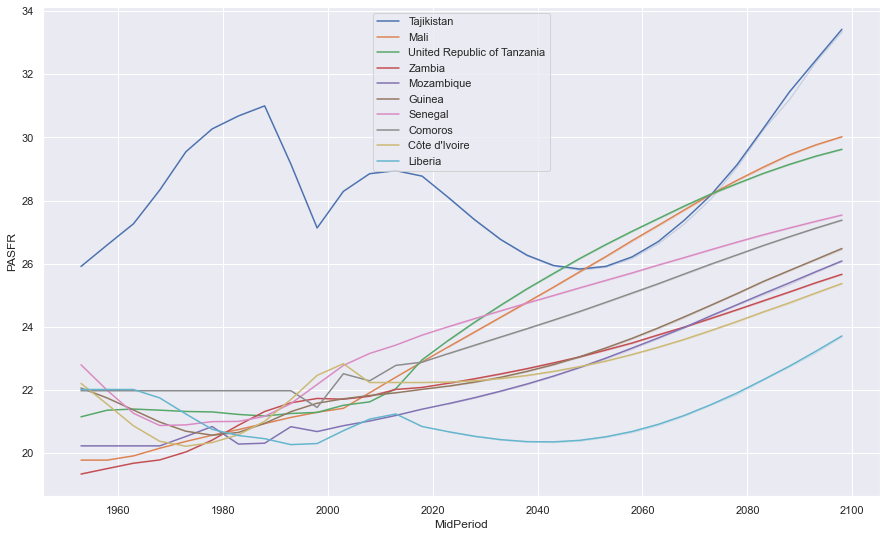

In [5]:
def greatest_fertility(series):
    low = float('inf')
    high =  float('-inf')
    current = series.iloc[-1]

    for pasfr in series:
        if pasfr < low:
            low = pasfr
        elif pasfr > high:
            high = pasfr

    return (current - low) if high <= pasfr else (float('-inf'))

fertility_growth_df = fertility_df.loc[fertility_df['AgeGrpStart'] == 25]
fertility_growth_df = fertility_growth_df.loc[fertility_growth_df['AgeGrpStart']==25].reset_index()\
   .groupby('Location')[['PASFR']].agg(greatest_fertility).reset_index().sort_values(by=['PASFR'], ascending=False).set_index('Location')

fertility_growth_df.drop(fake_countries, inplace=True)
fertile_10_countries = list(fertility_growth_df.index[:10])
print(f'Most fertile countries: {fertile_10_countries}')
fertile_10_countries_df = fertility_df.loc[(fertility_df['Location'].isin(fertile_10_countries) == True)&(fertility_df['AgeGrpStart']==25)]

fig, ax = plt.subplots()
for country in fertile_10_countries:
    graph = sns.lineplot(x='MidPeriod', y='PASFR', data=fertile_10_countries_df.loc[fertile_10_countries_df.Location==country], ax=ax, ci=0)
ax.legend(fertile_10_countries)